In [1]:
#importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import math
# from linear_regression import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from create_final_df import CreateDataframe
from polynomial_regression import PolynomialRegression

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

In [2]:
lr = LinearRegression()
df = CreateDataframe()
confirmed_df = df.get_final_df('Confirmed')
deaths_df = df.get_final_df('Deaths')
recovered_df = df.get_final_df('Recovered')
confirmed_df.head(110)

,Days,Date,Georgia,North Carolina,Wyoming,New Hampshire,Wisconsin,Minnesota,Maryland,Pennsylvania,...,Idaho,Oregon,Iowa,Vermont,West Virginia,Kansas,New Jersey,Washington,Missouri,Rhode Island
0,1,04-12,12452,4570,270,929,3341,1621,8225,22938,...,1407,1527,1587,727,593,1344,61850,10609,4269,2665
1,2,04-13,13315,4886,275,985,3428,1621,8936,24292,...,1426,1584,1710,748,611,1390,64584,10635,4515,2665
2,3,04-14,14578,5113,282,922,3555,1695,9472,25465,...,1464,1633,1899,752,640,1441,68824,10799,4746,3251
3,4,04-15,14987,5340,287,1139,3721,1809,10032,26753,...,1473,1663,1995,759,702,1504,71030,10942,4791,3251
4,5,04-16,15669,5639,296,1139,3875,1809,10784,28258,...,1587,1736,2141,774,728,1615,75317,11057,5174,3529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,106,07-26,167953,112937,2475,6436,48827,51153,83748,111745,...,18178,16758,42357,1400,5889,25290,179363,52635,42160,18224
106,107,07-27,170843,114916,2520,6441,49417,51803,84876,112995,...,18692,17088,42696,1402,5999,25804,179812,53321,43489,18515
107,108,07-28,175052,116700,2589,6500,50179,52281,85524,114083,...,19220,17408,42928,1405,6120,26058,180295,54205,45181,18725
108,109,07-29,178323,118387,2628,6513,51049,52947,86285,114939,...,19674,17721,43623,1406,6277,26591,180600,54985,46942,18800


In [3]:
#Create a dictionary of DF
confirmed_states_df = {}
training_days = np.array(confirmed_df["Days"][:30,]).reshape(-1, 1)
# print(training_days)
for column in confirmed_df: 
    if column != 'Days' and column != 'Date':
       confirmed_states_df[column] = confirmed_df[column]    
# # for state in confirmed_states_df:
# print(confirmed_states_df['Georgia'].values)
# scalar = StandardScaler()
# x = scalar.fit_transform(confirmed_states_df[state].values)
# print(x)

In [4]:
# creating list to store PR(degree=2) objects of states     
confirmed_states_model_list = [] 
for state_name, state_df in confirmed_states_df.items():
#     print(state_df[:30])
#     print(state_name)
#     print(state_df)
    pr_degree_2 = PolynomialRegression(3, state_name)
    pr_degree_2.train(training_days, state_df[:30])
    confirmed_states_model_list.append(pr_degree_2)

In [5]:
#PR Degree 2 predicitions, store prediciton fo each state in a dict
confirmed_states_pred_dict = {} 
period = 100
# print(period)
upcoming_days = 10
days = np.array(range(period, period + upcoming_days)).reshape(-1, 1)
for model in confirmed_states_model_list:
    confirmed_states_pred_dict[model.state_name] = model.get_predictions(days)

In [6]:
#Just testing California
print("The prediction in Georgia July 21st till July 30st are: ")
# print(np.reshape(confirmed_df['Georgia'][30:40],(10,1)))
# print(confirmed_df['Georgia'][30:40].shape)
ground_truth = np.array(confirmed_df["Georgia"][100:110,]).reshape(-1,)
prediction = confirmed_states_pred_dict['Georgia']

for i in range(len(prediction)):
    print('prediction for date: July ' + str(i + 21), prediction[i])
print(ground_truth)
# print(lr.compute_mse(prediction,ground_truth))
print('mean squared error:', metrics.mean_squared_error(ground_truth, prediction, squared=False))


The prediction in Georgia July 21st till July 30st are: 
prediction for date: July 21 147978
prediction for date: July 22 151314
prediction for date: July 23 154721
prediction for date: July 24 158199
prediction for date: July 25 161749
prediction for date: July 26 165372
prediction for date: July 27 169068
prediction for date: July 28 172839
prediction for date: July 29 176686
prediction for date: July 30 180610
[148988 152302 156607 161420 165188 167953 170843 175052 178323 182286]
mean squared error: 2189.8196729411306


[ 22795  23931  25356  26686  27677  29157  30491  31431  33686  35465
  37344  39561  41355  42368  43558  44966  46164  48747  50130  52026
  53347  54903  55884  58456  60616  62148  63779  66558  67600  69329
  70978  72798  74871  76693  78725  80166  81457  83752  85997  88031
  90252  92539  94020  96400  99387 101050 103813 106622 109895 111951
 114733 117215 119348 122168 125738 128593 130615 133816 136641 139715
 143377 146659 150018 152300 155726 158961 162798 167086 170862 175213
 178546 184765 191477 195925 201112 206844 210584 215296 223646 231232
 238681 246550 250514 252895 264681 271035 284012 292560 302484 310885
 318761 324543 333357 346211 354885 364706 373259 380745 386906 397870
 409305 421286 430773 440185 446452 452288 458121 470762 484913 492934
 500556 506613 512175 516851 526685 530606 541339 546814 554388 559746
 574231 578946 591376 597984 613101 617994 623873 629415 638140 647274
 652267 658900 664435 669280 675561 681032 687004 691821 697385 702038
 70595

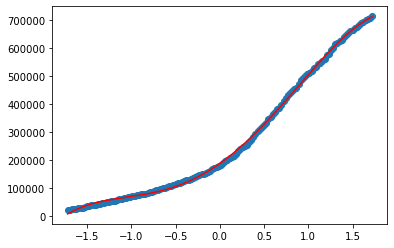

In [34]:
# Cross Validation
lr = LinearRegression()
scaler = StandardScaler()
poly = PolynomialFeatures(degree=4)

y_train = np.array(confirmed_df['California']).reshape(-1,)
X_train = np.array([[num] for num in range(0, 142)])

X_scaled = scaler.fit_transform(X_train, y_train)
X_transform = poly.fit_transform(X_scaled)

lr.fit(X_transform, y_train)
y_pred = lr.predict(X_transform)
# print(y_pred - np.array(confirmed_df['Georgia']).reshape(-1,))

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(X_scaled, y_train)
ax.plot(X_scaled, y_pred, color='r')

print(y_train)
print(y_pred)
print(metrics.mean_squared_error(y_train, y_pred))

scores = cross_val_score(lr, X_transform, y=y_train, scoring='r2', cv=10)
print(scores)
print([math.sqrt(- np.average(scores))])


X_test = np.array([[num] for num in range(142, 168)])
print(X_test)


validation_errors = []
for i in range(2, 20):
    lr = LinearRegression()
    
    poly = PolynomialFeatures(degree=i)
    X_transform = poly.fit_transform(np.array([[num] for num in range(0, 142)]))
    scores = cross_val_score(lr, X_transform, y=np.array(confirmed_df['Georgia']).reshape(-1,), scoring='neg_mean_squared_error', cv=10)
#     print(scores)
    validation_errors += [math.sqrt(- np.average(scores))]
    
print(validation_errors)




[714031.06584672 717198.7329816  719999.64478089 722420.21635123
 724446.68436869 726065.10707877 727261.36429641 728021.15740597
 728330.00936126 728173.26468551 727536.08947138 726403.47138099
 724760.21964587 722590.96506697 719880.16001471 716612.07842892
 712770.81581887 708340.28926325 703304.2374102  697646.22047729
 691349.62025152 684397.64008931 676773.30491655 668459.46122852
 659438.77708996 649693.74213505]
[5779.48115787 5863.29061524 5948.60014909 6035.42777462 6123.79150699
 6213.70936139 6305.19935301 6398.27949703 6492.96780863 6589.282303
 6687.2409953  6786.86190074 6888.16303449 6991.16241173 7095.87804764
 7202.32795742 7310.53015623 7420.50265927 7532.26348172 7645.83063875
 7761.22214555 7878.45601731 7997.55026921 8118.52291642 8241.39197413
 8366.17545753]
[272263.46371915 273416.45848557 274407.62400635 275230.64478843
 275879.11824631 276346.55470209 276626.37738542 276711.92243355
 276596.43889131 276273.08871108 275734.94675285 274975.00078416
 273986.1514

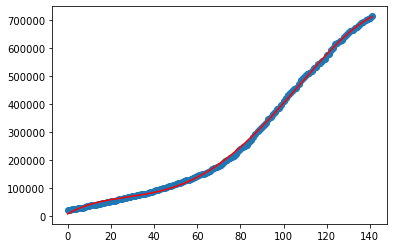

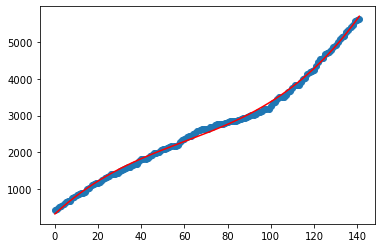

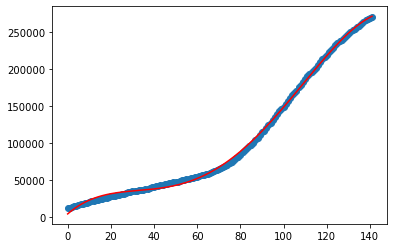

In [64]:
def polyReg(state='California', case_type='Confirmed'):
    
    # Initialize objects
    lr = LinearRegression()
    df = CreateDataframe()
    
    # Get dataframe
    p_df = df.get_final_df(case_type)
    
    # Initialize test and train inputs
    X_train = np.array([[num] for num in range(0, 142)])
    X_test = np.array([[num] for num in range(142, 168)])
    
    y_train = np.array(p_df[state]).reshape(-1,)
    
    # Perform cross-validation
    validation_errors = []
    for i in range(1, 6):
        poly = PolynomialFeatures(degree=i)
        X_transform = poly.fit_transform(X_train)
        
        validation_scores = cross_val_score(lr, X_transform, y=y_train, scoring='neg_mean_squared_error', cv=10)
        validation_errors += [math.sqrt(- np.average(validation_scores))]
    
    # Find best polynomial degree
    validation_errors = np.array(validation_errors)
    best_degree = np.where(validation_errors == validation_errors.min())[0][0] + 1
#     print(validation_errors)
#     print(best_degree)
    
    # Train and predict best model
    poly = PolynomialFeatures(degree=best_degree)
    X_transform = poly.fit_transform(X_train)
    lr.fit(X_transform, y_train)
    y_train_pred = lr.predict(X_transform)
    
    # Plot scatter
#     fig = plt.figure()
#     ax = fig.add_subplot(111)
#     ax.scatter(X_train, y_train)
#     ax.plot(X_train, y_train_pred, color='r')
    
    X_test_transform = poly.fit_transform(X_test)
    y_pred = lr.predict(X_test_transform)
    
    return y_pred

print(polyReg())
print(polyReg('Georgia', 'Deaths'))
print(polyReg('Georgia', 'Confirmed'))